# Iteration 4 BDAS Step 2

## xzha710 408571028

Setup and Data Loading

In [6]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import *

# Create a Spark session
spark = SparkSession.builder.appName("AgrofoodAnalysis").getOrCreate()

# Load the dataset from the uploaded path
data = spark.read.csv("Agrofood_co2_emission.csv", header=True, inferSchema=True)

# Show the summary statistics
data.describe().show()

# Show the columns
print(data.columns)


+-------+-----------+------------------+------------------+-----------------+------------------+------------------+---------------------------+------------------------+------------------+-------------------+---------------------+--------------------------+------------------+-----------------------+------------------+-------------------------------+------------------+-------------------------+------------------+-----------------------+----------------------+------------------+----------------------+-------------------------------+------------------+--------------------+-------------------+-----------------------+-------------------------+-------------------+----------------------+
|summary|       Area|              Year|     Savanna fires|     Forest fires|     Crop Residues|  Rice Cultivation|Drained organic soils (CO2)|Pesticides Manufacturing|    Food Transport|         Forestland|Net Forest conversion|Food Household Consumption|       Food Retail|On-farm Electricity Use|    Food Pac

Data Processing

In [9]:
# Calculate the total population (both sexes)
data = data.withColumn('Total Population', data['Total Population - Male'] + data['Total Population - Female'])

Visualization - Histogram of Average Temperature

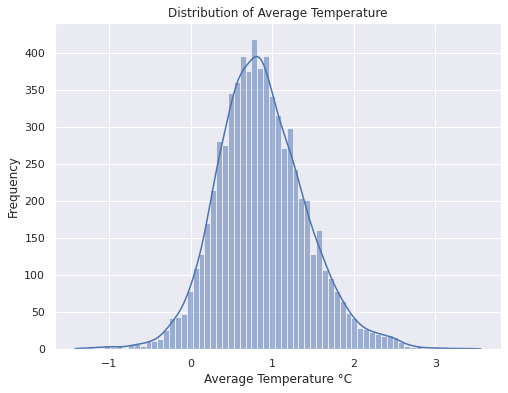

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to Pandas for visualization
pdf = data.toPandas()

# Set the seaborn style
sns.set()

# Histogram: For the "Average Temperature °C" column
plt.figure(figsize=(8, 6))
sns.histplot(pdf['Average Temperature °C'], kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature °C')
plt.ylabel('Frequency')
plt.show()

Visualization - Boxplot of Savanna Fires Emissions

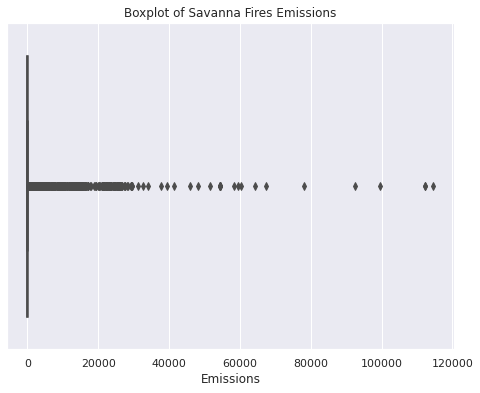

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=pdf['Savanna fires'])
plt.title('Boxplot of Savanna Fires Emissions')
plt.xlabel('Emissions')
plt.show()


Visualization - Scatterplot of Total Population vs. Total Emissions

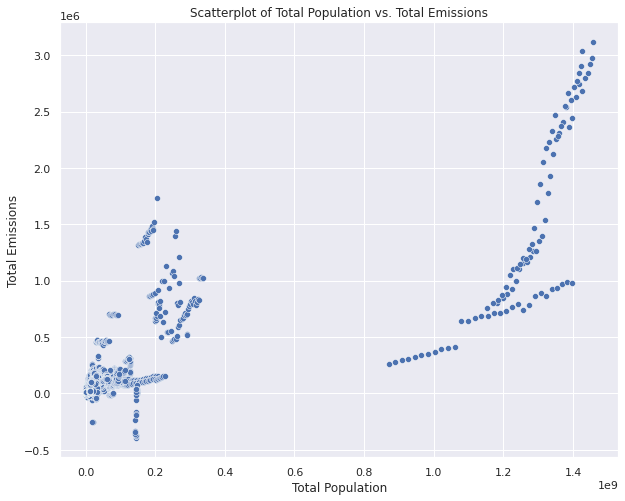

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pdf['Total Population'], y=pdf['total_emission'])
plt.title('Scatterplot of Total Population vs. Total Emissions')
plt.xlabel('Total Population')
plt.ylabel('Total Emissions')
plt.show()

Handle Missing Values and Visualization

Columns with missing values and their percentages:
                                 missing_count  missing_percentage
Crop Residues                             1389           19.942570
On-farm energy use                         956           13.725772
Manure applied to Soils                    928           13.323762
Manure Management                          928           13.323762
IPPU                                       743           10.667624
Forestland                                 493            7.078248
Net Forest conversion                      493            7.078248
Food Household Consumption                 473            6.791098
Fires in humid tropical forests            155            2.225413
Forest fires                                93            1.335248
Savanna fires                               31            0.445083


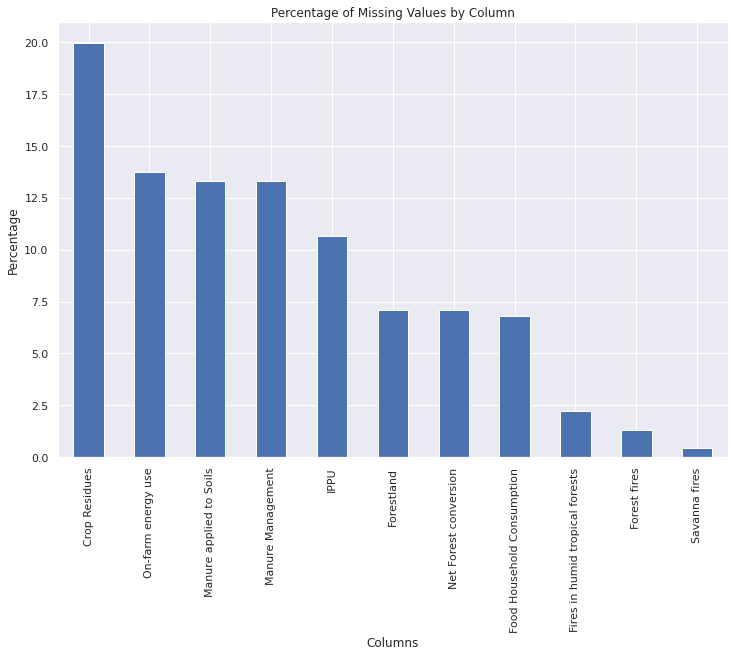

Columns with their count of missing values:
Crop Residues                      1389
On-farm energy use                  956
Manure applied to Soils             928
Manure Management                   928
IPPU                                743
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Fires in humid tropical forests     155
Forest fires                         93
Savanna fires                        31
Name: missing_count, dtype: int64


In [13]:
# Calculate number of missing values in each column
missing_values = data.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in data.columns])

# Convert the result to Pandas for further processing
missing_pdf = missing_values.toPandas().transpose()
missing_pdf.columns = ["missing_count"]
missing_pdf["missing_percentage"] = (missing_pdf["missing_count"] / data.count()) * 100

# Filter out the columns which have missing values and sort them
missing_data = missing_pdf[missing_pdf["missing_count"] > 0].sort_values(by="missing_percentage", ascending=False)

print("Columns with missing values and their percentages:")
print(missing_data)

# Visualize the missing values
plt.figure(figsize=(12, 8))
missing_data["missing_percentage"].plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

print("Columns with their count of missing values:")
print(missing_data["missing_count"])
